In [3]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all
 
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
 
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort
 
# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.byu.id',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000             # Jumlah maksimum ulasan yang ingin diambil
)

In [5]:
# Menyimpan ulasan dalam file CSV
import csv
 
with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

In [8]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)
 
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)
 
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
print(f'Jumlah baris: {jumlah_ulasan}')
print(f'Jumlah kolom: {jumlah_kolom}')

Jumlah baris: 85500
Jumlah kolom: 11


In [9]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,da82c03a-fd4a-40c9-b69e-cf8666f4639e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa berat dengan pengalaman saya membeli pa...,1,63,1.61.0,2025-03-19 04:09:45,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-19 09:40:39,1.61.0
1,195a4528-1f7f-4d6a-8f60-c0bd5f917408,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"over all bagus sih mulai dri sinyal, pilihan k...",5,16,1.61.0,2025-03-21 00:05:09,None,NaT,1.61.0
2,eb18c779-6f74-4cf4-8e65-bf18a160c20b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Walaupun berguna buat ngecek dan beli berbagai...,2,31,1.60.0,2025-03-07 17:32:46,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-07 22:14:13,1.60.0
3,0c42a701-e181-47b7-bf97-9db85552bb99,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ku kasih bintang 1, mampus! Karena memang apli...",1,269,1.60.0,2025-03-05 18:13:08,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-06 12:14:20,1.60.0
4,81e76878-c284-46f4-921c-ad245240dba5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pengalaman pertama pakai By.U, sinyalnya 11/12...",3,62,1.60.0,2025-02-20 19:33:21,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-02-21 10:03:55,1.60.0


In [10]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85500 entries, 0 to 85499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              85500 non-null  object        
 1   userName              85500 non-null  object        
 2   userImage             85500 non-null  object        
 3   content               85500 non-null  object        
 4   score                 85500 non-null  int64         
 5   thumbsUpCount         85500 non-null  int64         
 6   reviewCreatedVersion  69875 non-null  object        
 7   at                    85500 non-null  datetime64[ns]
 8   replyContent          80278 non-null  object        
 9   repliedAt             80278 non-null  datetime64[ns]
 10  appVersion            69875 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.2+ MB


In [11]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [13]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()
 
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f'Jumlah baris setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}')
print(f'Jumlah kolom setelah menghapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}')

Jumlah baris setelah menghapus duplikat: 65327
Jumlah kolom setelah menghapus duplikat: 11


In [14]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,da82c03a-fd4a-40c9-b69e-cf8666f4639e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa berat dengan pengalaman saya membeli pa...,1,63,1.61.0,2025-03-19 04:09:45,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-19 09:40:39,1.61.0,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,"[kecewa, berat, dengan, pengalaman, saya, memb...","[kecewa, berat, pengalaman, membeli, paket, ku...",kecewa berat pengalaman membeli paket kuota su...
2,eb18c779-6f74-4cf4-8e65-bf18a160c20b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Walaupun berguna buat ngecek dan beli berbagai...,2,31,1.60.0,2025-03-07 17:32:46,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-07 22:14:13,1.60.0,Walaupun berguna buat ngecek dan beli berbagai...,walaupun berguna buat ngecek dan beli berbagai...,walaupun berguna buat ngecek dan beli berbagai...,"[walaupun, berguna, buat, ngecek, dan, beli, b...","[berguna, ngecek, beli, apk, bermasalah, kali,...",berguna ngecek beli apk bermasalah kali buka a...
3,0c42a701-e181-47b7-bf97-9db85552bb99,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ku kasih bintang 1, mampus! Karena memang apli...",1,269,1.60.0,2025-03-05 18:13:08,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-06 12:14:20,1.60.0,Ku kasih bintang mampus Karena memang aplikas...,ku kasih bintang mampus karena memang aplikas...,ku kasih bintang mampus karena memang aplikasi...,"[ku, kasih, bintang, mampus, karena, memang, a...","[kasih, bintang, mampus, aplikasi, sampah, jar...",kasih bintang mampus aplikasi sampah jaringan ...
4,81e76878-c284-46f4-921c-ad245240dba5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pengalaman pertama pakai By.U, sinyalnya 11/12...",3,62,1.60.0,2025-02-20 19:33:21,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-02-21 10:03:55,1.60.0,Pengalaman pertama pakai ByU sinyalnya sama k...,pengalaman pertama pakai byu sinyalnya sama k...,pengalaman pertama pakai byu sinyalnya sama ka...,"[pengalaman, pertama, pakai, byu, sinyalnya, s...","[pengalaman, pakai, byu, sinyalnya, kayak, tel...",pengalaman pakai byu sinyalnya kayak telkomsel...
5,0a03b575-362e-4544-be68-924f0c358da3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kualitas menurun, tidak seperti awal muncul, t...",2,11,1.60.0,2025-03-10 05:41:54,Hai Kak Galih :) Maaf banget bikin Kakak gak n...,2025-03-10 05:48:34,1.60.0,Kualitas menurun tidak seperti awal muncul ter...,kualitas menurun tidak seperti awal muncul ter...,kualitas menurun tidak seperti awal muncul ter...,"[kualitas, menurun, tidak, seperti, awal, munc...","[kualitas, menurun, muncul, buka, wa, instagra...",kualitas menurun muncul buka wa instagram buff...


In [18]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [19]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [20]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    37546
positive    27781
Name: count, dtype: int64


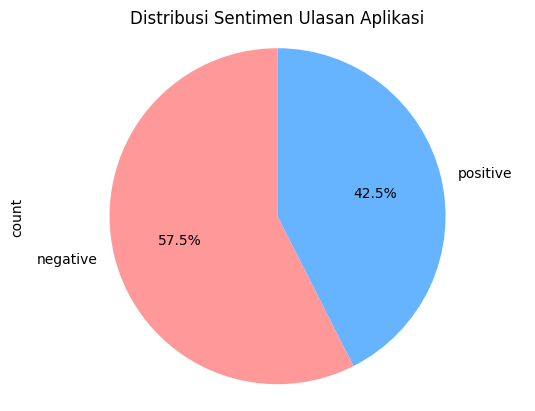

In [21]:
# pie chart
fig, ax = plt.subplots()
clean_df['polarity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], ax=ax)
ax.axis('equal')
plt.title('Distribusi Sentimen Ulasan Aplikasi')
plt.show()